# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split #Used to split data set into training and testing

# Importing and splitting dataset

In [2]:
import csv
file = open("audi.csv")
tester = csv.reader(file)
# print(tester)
rows = []
for row in tester:
        rows.append(row)
rows.pop(0)
# print(rows)
# csv_file = (r'UKUsedCarDataSet\audi.csv')
# txt_file = ('test.txt')
# with open(txt_file, "w") as my_output_file:
#     with open(csv_file, "r") as my_input_file:
#         [ my_output_file.write(" ".join(row)+'\n') for row in csv.reader(my_input_file)]
#     my_output_file.close()

test = pd.read_csv("audi.csv", quotechar='"', skipinitialspace=True)
# print(test.year[1])
Y = test.price
X = test.drop(['price', 'model', 'transmission', 'fuelType'], axis = 1) 
X = X.head(200)
Y = Y.head(200)
# X = X.reset_index()
# X = X.drop(0)
# X = test.drop('model', axis = 1)
#             ('transmission', 'fuelType')
# print(X)

# Y = np.genfromtxt("audi.csv", delimiter = ",", skip_header = 1, usecols=(2)) #label is price
# print(Y)
# X = np.genfromtxt("audi.csv", delimiter = ",", skip_header = 1, usecols=(1, 4, 6, 7, 8)) #, dtype=int
# X = np.genfromtxt("audi.csv", delimiter = ",", skip_header = 1, usecols=(1, 4, 7))
# print(X)
# Xpend = []
# Ypend = []
# for i in range(1,200):
#     Xpend.append(X[i])
#     Ypend.append(Y[i])
# print(Xpend)

In [3]:
# dataLocation = (r'UKUsedCarDataSet\audi.csv')
# dataSet = pd.read_csv(dataLocation, nrows=200)
# Specific_Rows = dataSet.sample(n=200)
# features = ['year', 'mileage', 'tax', 'mpg', 'engineSize'] #may try transmission and fuel type later

# X = dataSet[features]
# Y = dataSet['price']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 601)
# print(X)
# print(X_train.shape)
# print(X_train[3])

In [4]:
# from mpl_toolkits.mplot3d import Axes3D
# fig = plt.figure(figsize=(8, 8))
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(X_train[:,0],X_train[:,1],Y_train, c = "red",alpha=.5, marker = 'o')
# ax.set_xlabel('X_1')
# ax.set_ylabel('X_2')
# ax.set_zlabel('Y')
# plt.show()

# KNN using Scikit-Learn

Text(0, 0.5, 'Error rate')

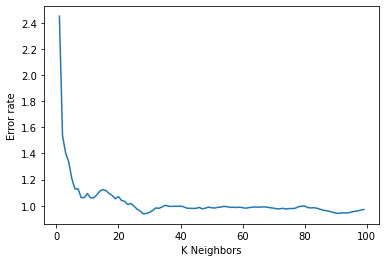

In [5]:
from sklearn.neighbors import KNeighborsRegressor as KNN_Reg

results = np.empty(99)
for k in range(1, 100):
    knn = KNN_Reg(n_neighbors = k)
    knn.fit(X_train, Y_train)
    results[k - 1] = (1- knn.score(X_test, Y_test))

plt.plot(np.arange(99) + 1, results)
plt.xlabel('K Neighbors')
plt.ylabel('Error rate')

# Euclidean Distance

In [6]:
def eucDistance(variable1, variable2):
    distance = 0
    for i in range(len(variable2)):
        distance += (variable1[i] - variable1[i])**2
    return np.sqrt(distance)

# KNN

In [7]:
def kNN(train, testRow, yTrain, yTest, num):
    distance = list() #Stores distance of each point
    for i in range(len(train)-1):
        dist = eucDistance(train.iloc[i], testRow) #sends points to work out distance
        distance.append((train.iloc[i], dist, yTrain.iloc[i])) 
    distance = sort(distance) #need to create a sort method to order list
    kNeighbours = list() #list to store K amount of neighbour results
    for i in range(num):
        kNeighbours.append((testRow, distance[i][1], distance[i][2]))
    return kNeighbours 

# for testRow in X_test:
#     kNN(X_train, testRow, Y_train, Y_test, 1)
# print(kNN(X_train, X_test[1], Y_train, Y_test, 1))

# Sort Method

In [8]:
def sort(dist):
    for i in range(0, len(dist)):
        for j in range(0, len(dist) - i - 1):
            if (dist[j][1] > dist[j + 1][1]):
                temp = dist[j]
                dist[j] = dist[j + 1]
                dist[j + 1] = temp
    return dist

# Predict Method

In [13]:
from statistics import mean 

def predict(train, test, yTrain, yTest, num_neighbors):
    predictions = list()
#     print(test)
    for i in range(len(test)): #Sends each test variable
        neighbour = kNN(train, test.iloc[i], yTrain, yTest, num_neighbors)
        labels = [] #Stores yTrain for each test variable
        for i in range (len(neighbour)):
            t = labels.append(neighbour[i][2]) #Appends yTrain
            print(neighbour[i])
#         predictions.append(max(labels, key = labels.count)) #works out mode of the labels
        predictions.append(mean(labels))
#         print(mean(labels))
    return predictions

# 1NN

In [14]:
def NN(train, test, yTrain, yTest):    
    numbErr = 0
    y_pred = predict(train, test, yTrain, yTest, 1)
    wrongSum = 0
    for i in range(len(yTest)):
#     for i in range(1,3):
        if (y_pred[i] != yTest.iloc[i]):
            wrongSum += 1
    numbErr = (wrongSum/len(yTest))
    print("Number of Errors:", wrongSum)
    print("Test Error Rate:", numbErr)
    return numbErr

NN(X_train, X_test, Y_train, Y_test)

(year           2015.0
mileage       34646.0
tax              30.0
mpg              61.4
engineSize        2.0
Name: 183, dtype: float64, 0.0, 11750)
(year           2017.0
mileage       44898.0
tax             125.0
mpg              57.7
engineSize        2.0
Name: 63, dtype: float64, 0.0, 11750)
(year           2018.0
mileage       42209.0
tax             145.0
mpg              42.2
engineSize        2.0
Name: 161, dtype: float64, 0.0, 11750)
(year           2017.0
mileage       21369.0
tax             125.0
mpg              51.4
engineSize        1.4
Name: 31, dtype: float64, 0.0, 11750)
(year           2016.0
mileage       44915.0
tax             145.0
mpg              52.3
engineSize        2.0
Name: 12, dtype: float64, 0.0, 11750)
(year           2016.0
mileage       18272.0
tax               0.0
mpg              67.3
engineSize        1.0
Name: 110, dtype: float64, 0.0, 11750)
(year           2015.0
mileage       62668.0
tax             145.0
mpg              53.3
engineSize    

1.0